In [1]:
from google.colab import drive
import os
import glob
import pandas as pd

drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/data-science-veiculos-poluicao'
os.chdir(folder_path)

print(os.listdir())

# Get a list of all CSV files in the 'iema' directory
csv_files = glob.glob('iema/*.csv')

Mounted at /content/drive
['senatran', 'iema', 'senastran_tipo.ipynb', 'MSysObjects.csv', '2025-07-20 18-33-52.mkv', 'iema-agg', 'senatran-agg', 'cidades_lookup.csv', 'cidades.ipynb', 'iema.ipynb', 'TCC ESALQ USP DATA SCIENCE.gdoc', 'analise_1.ipynb']


In [2]:
# Create an empty list to store dataframes
all_dataframes = []

# Iterate through the list of CSV files and read each one
for file in csv_files:
  try:
    df = pd.read_csv(file, encoding='utf-8-sig') # Use utf-8-sig to handle BOM
    all_dataframes.append(df)
  except Exception as e:
    df = pd.read_csv(file, encoding='latin-1')
    all_dataframes.append(df)

# Concatenate all dataframes into a single dataframe
if all_dataframes:
  compiled_df = pd.concat(all_dataframes, ignore_index=True)
  # Rename columns to remove BOM character if it exists
  compiled_df.columns = compiled_df.columns.str.replace('ï»¿', '')
  print("Successfully compiled data from all CSV files in the 'iema' directory.")
  # You can now work with the compiled_df
else:
  print("No dataframes were successfully read to compile.")

Successfully compiled data from all CSV files in the 'iema' directory.


In [3]:
compiled_df.head()

,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
0,2015-01-01,00:00,Concórdia,BA06,CO,0.36,ppm,automatico
1,2015-01-01,01:00,Concórdia,BA06,CO,0.86,ppm,automatico
2,2015-01-01,02:00,Concórdia,BA06,CO,0.72,ppm,automatico
3,2015-01-01,03:00,Concórdia,BA06,CO,0.22,ppm,automatico
4,2015-01-01,04:00,Concórdia,BA06,CO,0.17,ppm,automatico


In [4]:
# Convert 'Data' column to datetime objects
compiled_df['Data'] = pd.to_datetime(compiled_df['Data'], errors='coerce', format='mixed')

# Extract the month
compiled_df['Month'] = compiled_df['Data'].dt.to_period('M')

print(compiled_df.head())

# Group by the specified columns and the newly created 'Month' column
monthly_avg_df = compiled_df.groupby(['Month', 'Estacao', 'Codigo', 'Poluente', 'Unidade', 'Tipo'])['Valor'].mean().reset_index()

        Data   Hora    Estacao Codigo Poluente  Valor Unidade        Tipo  \
0 2015-01-01  00:00  Concórdia   BA06       CO   0.36     ppm  automatico   
1 2015-01-01  01:00  Concórdia   BA06       CO   0.86     ppm  automatico   
2 2015-01-01  02:00  Concórdia   BA06       CO   0.72     ppm  automatico   
3 2015-01-01  03:00  Concórdia   BA06       CO   0.22     ppm  automatico   
4 2015-01-01  04:00  Concórdia   BA06       CO   0.17     ppm  automatico   

     Month  
0  2015-01  
1  2015-01  
2  2015-01  
3  2015-01  
4  2015-01  


In [5]:
monthly_avg_df.head()

,Month,Estacao,Codigo,Poluente,Unidade,Tipo,Valor
0,2015-01,Americana - Vila Santa Maria,SP01,MP10,ug/m3,automatica,24.389650
1,2015-01,Americana - Vila Santa Maria,SP01,O3,ug/m3,automatica,61.180028
2,2015-01,Anchieta Centro,ES12,MP10,ug/m3,automatica,40.129945
3,2015-01,Anchieta Centro,ES12,MP2.5,ug/m3,automatica,6.615899
4,2015-01,Anchieta Centro,ES12,PTS,ug/m3,automatica,51.927136


In [6]:
# Create the subdirectory if it doesn't exist
if not os.path.exists('iema-agg'):
    os.makedirs('iema-agg')

# Save the dataframe to a CSV file in the 'iema' subdirectory
monthly_avg_df.to_csv('iema-agg/iema-mensal.csv', index=False)

print("Successfully saved the dataframe to 'iema-agg/iema-mensal.csv'")

Successfully saved the dataframe to 'iema-agg/iema-mensal.csv'


In [7]:
monthly_avg_df.head()

,Month,Estacao,Codigo,Poluente,Unidade,Tipo,Valor
0,2015-01,Americana - Vila Santa Maria,SP01,MP10,ug/m3,automatica,24.389650
1,2015-01,Americana - Vila Santa Maria,SP01,O3,ug/m3,automatica,61.180028
2,2015-01,Anchieta Centro,ES12,MP10,ug/m3,automatica,40.129945
3,2015-01,Anchieta Centro,ES12,MP2.5,ug/m3,automatica,6.615899
4,2015-01,Anchieta Centro,ES12,PTS,ug/m3,automatica,51.927136


In [8]:
unique_pollutants = monthly_avg_df['Poluente'].unique()
print(unique_pollutants)

['MP10' 'O3' 'MP2.5' 'PTS' 'SO2' 'NO2' 'CO' 'FMC' 'NO' 'PM10']


In [22]:
unique_pollutants = ['SO2', 'NO2', 'CO', 'O3']

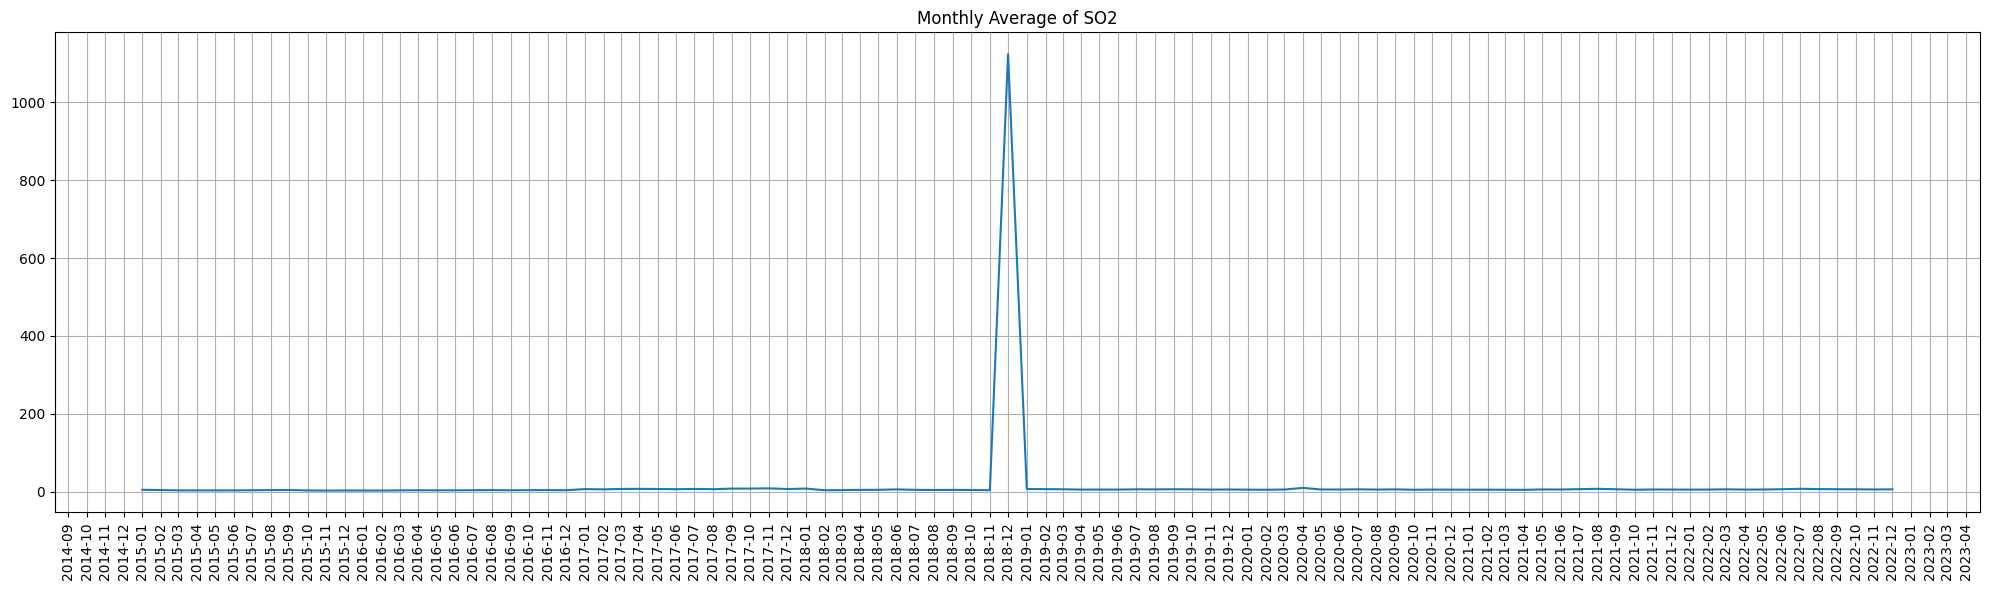

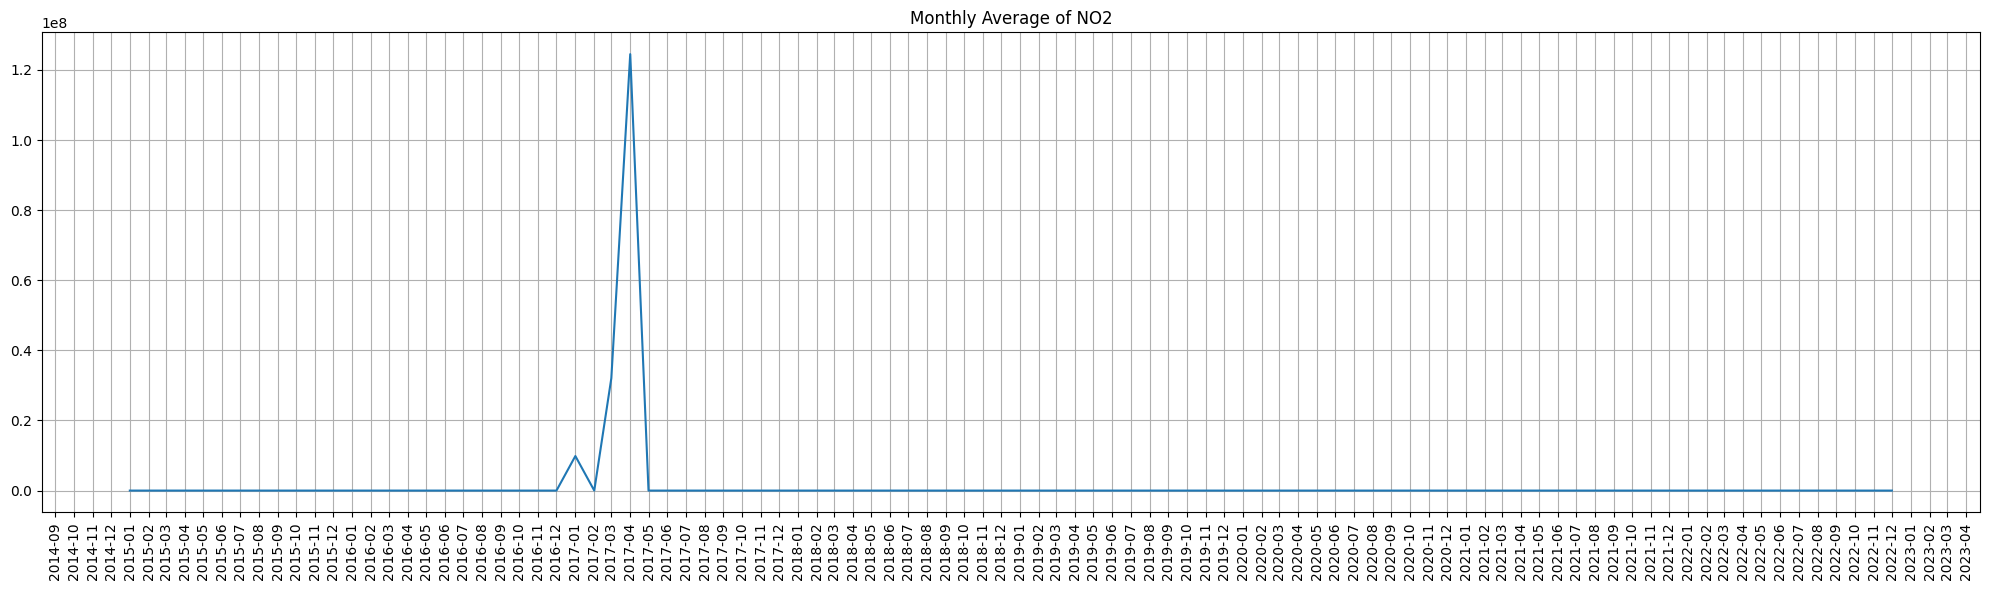

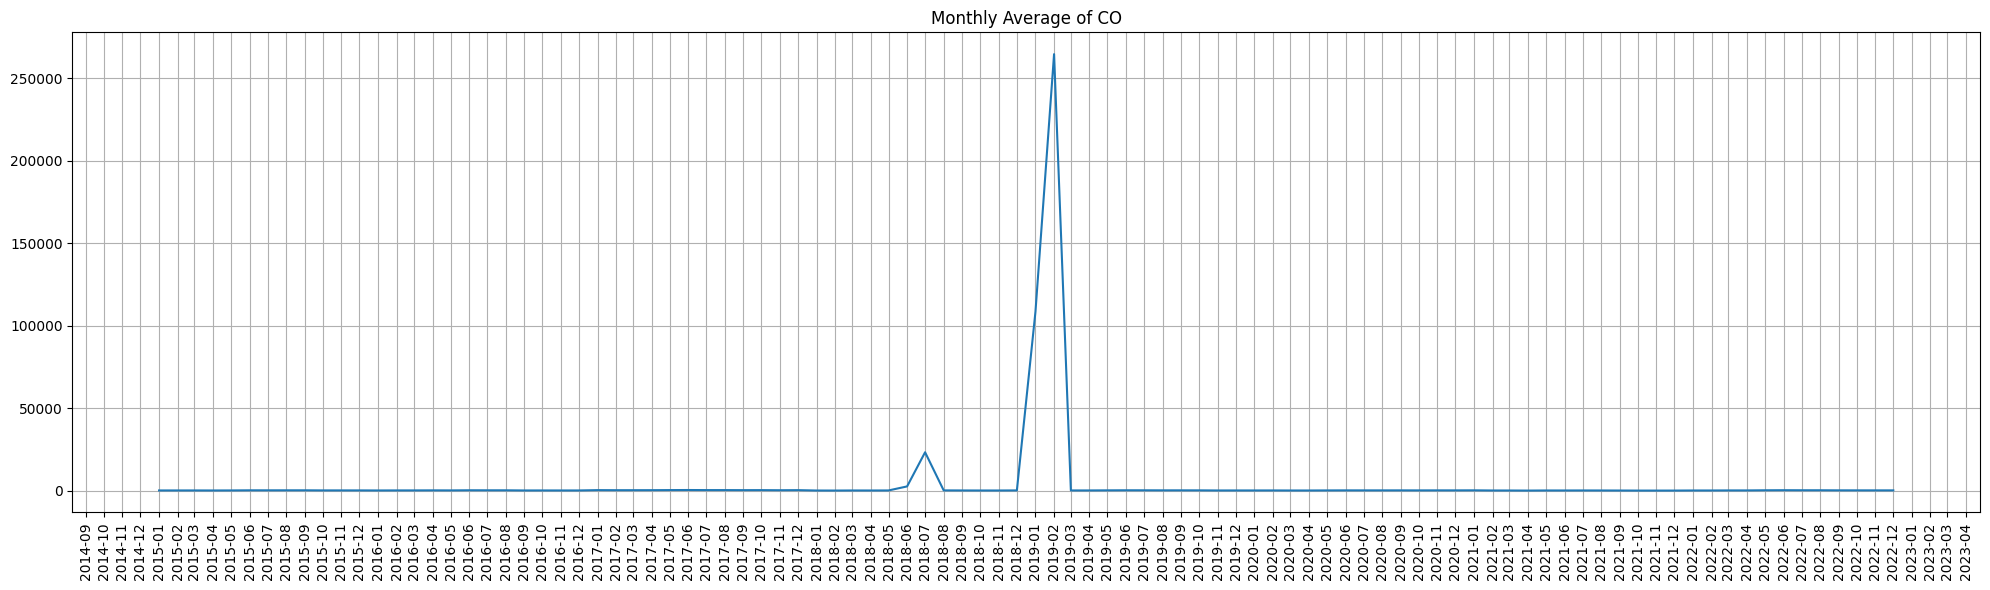

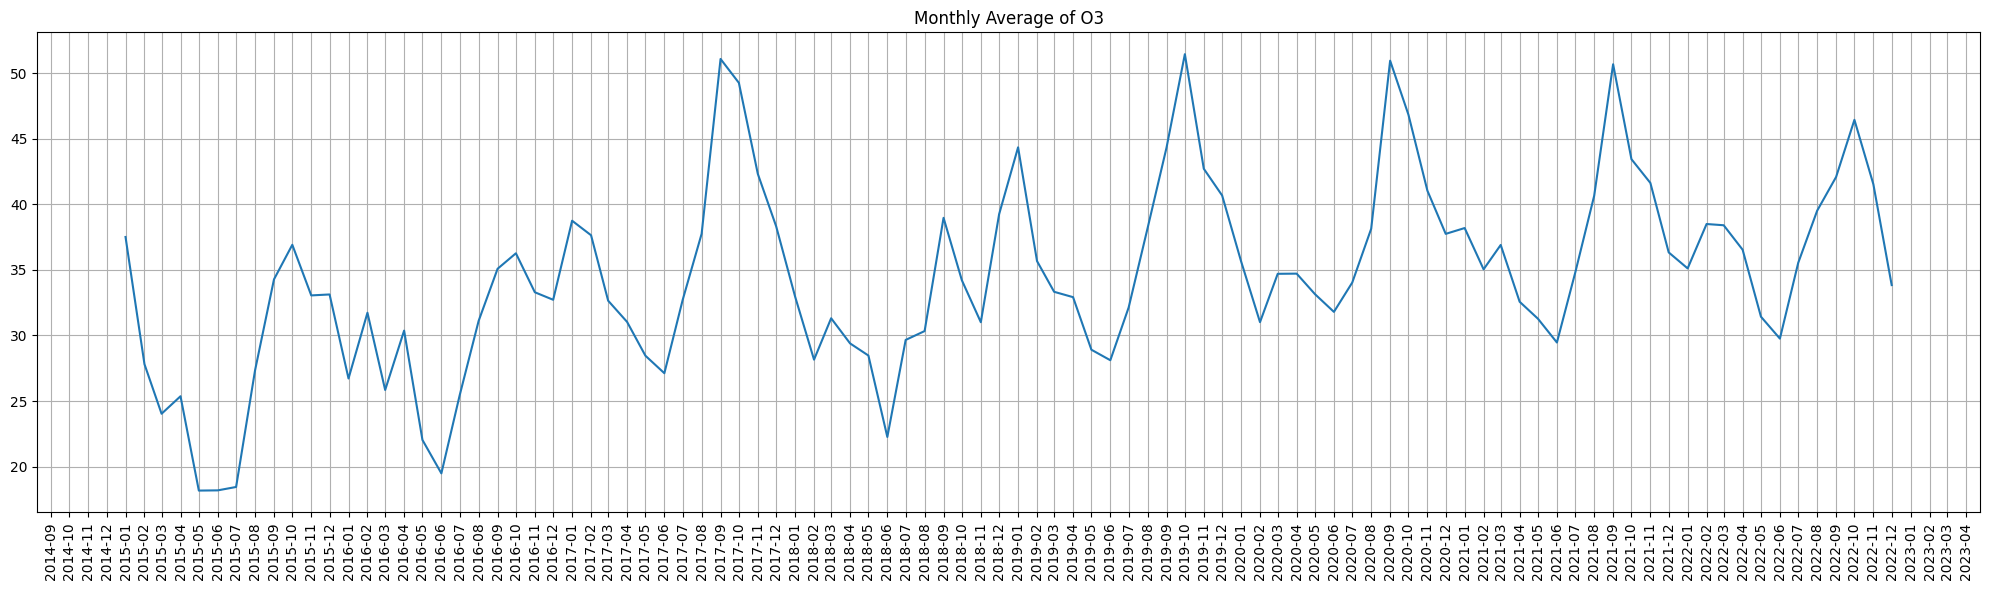

,Month,Valor
0,2015-01-01,37.508900
1,2015-02-01,27.810044
2,2015-03-01,24.031059
3,2015-04-01,25.365591
4,2015-05-01,18.172711


In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

for pollutant in unique_pollutants:
  # Filter the dataframe for the current pollutant
  pollutant_df = monthly_avg_df[monthly_avg_df['Poluente'] == pollutant].copy()

  pollutant_df = pollutant_df.groupby(['Month'], as_index=False)['Valor'].mean()

  pollutant_df['Month'] = pd.to_datetime(pollutant_df['Month'].astype(str))

  # Create the plot
  plt.figure(figsize=(20, 6))
  plt.plot(pollutant_df['Month'], pollutant_df['Valor'])
  plt.title(f'Monthly Average of {pollutant}')
  plt.grid(True)

  ax = plt.gca() # Get the current axes
  ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

  plt.xticks(rotation=90)
  plt.tight_layout() # Adjust layout to prevent labels from overlapping

  plt.show()

pollutant_df.head()

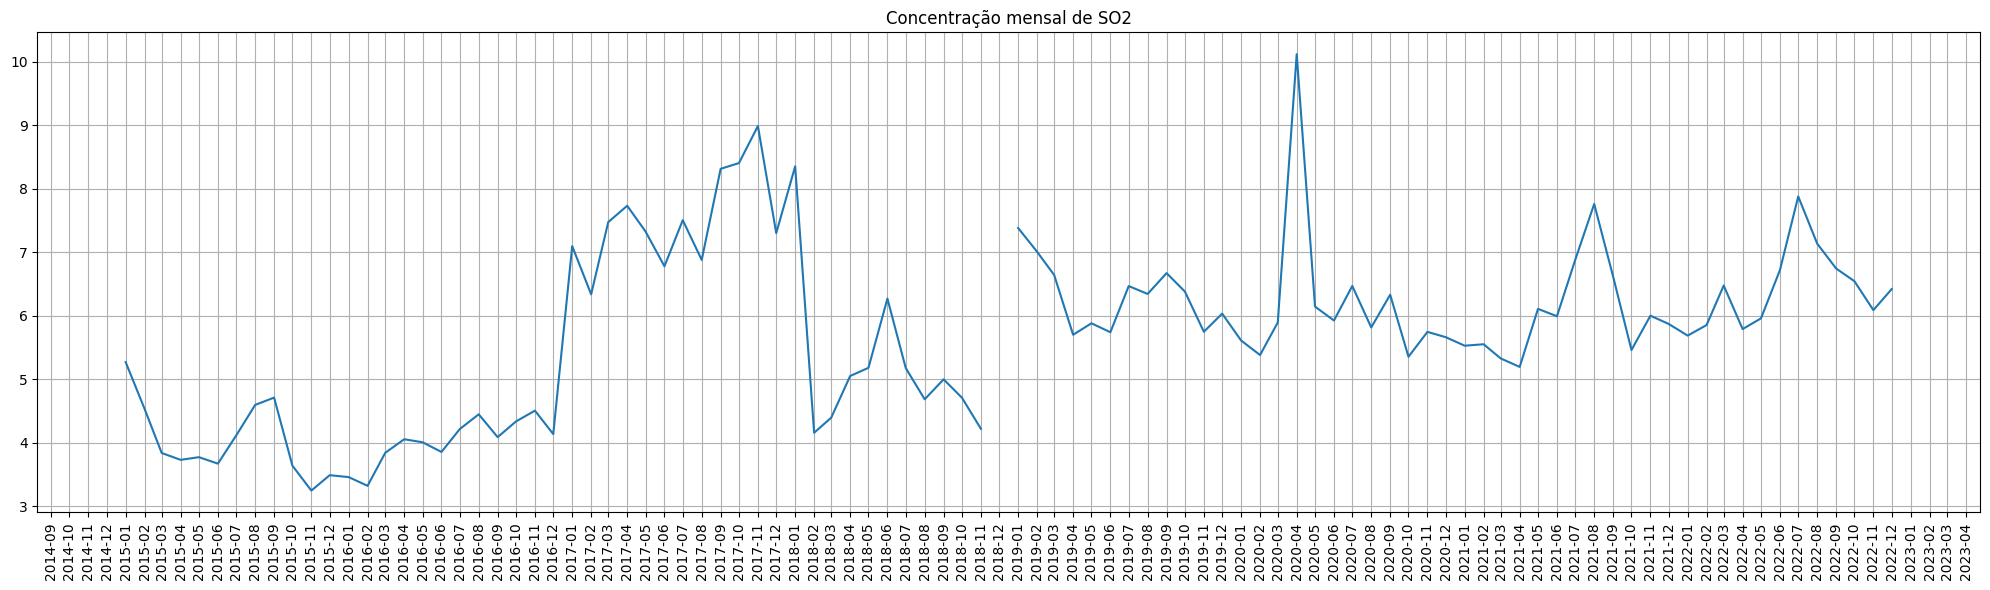

In [33]:
poluente = 'SO2'

pollutant_df = monthly_avg_df[monthly_avg_df['Poluente'] == poluente].copy()

pollutant_df = pollutant_df.groupby(['Month'], as_index=False)['Valor'].mean()

pollutant_df['Month'] = pd.to_datetime(pollutant_df['Month'].astype(str))

pollutant_df.loc[(pollutant_df['Month'] == '2018-12-01')] = None

marca_modelo_senatran_interpolated['qtd'] = marca_modelo_senatran_interpolated.groupby(['cidade', 'id', 'UF', 'category'])['qtd'].transform(lambda x: x.interpolate(method='linear'))

# Create the plot
plt.figure(figsize=(20, 6))
plt.plot(pollutant_df['Month'], pollutant_df['Valor'])
plt.title(f'Concentração mensal de {poluente}')
plt.grid(True)

ax = plt.gca() # Get the current axes
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=90)
plt.tight_layout() # Adjust layout to prevent labels from overlapping

plt.show()

In [29]:
pollutant_df.head()

,Month,Valor
0,2015-01-01,5.266663
1,2015-02-01,4.529706
2,2015-03-01,3.835610
3,2015-04-01,3.727340
4,2015-05-01,3.769498


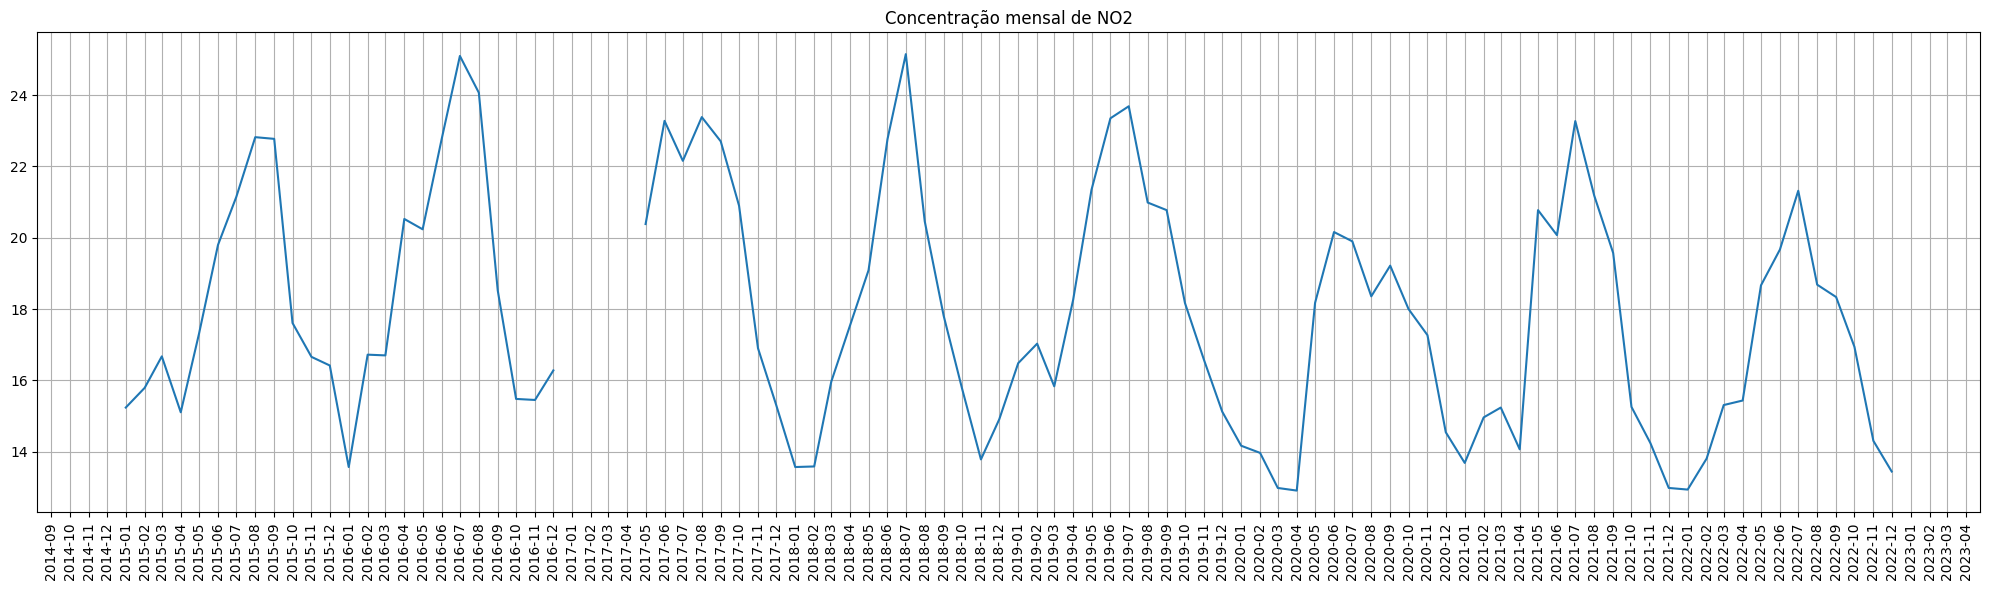

In [37]:
poluente = 'NO2'

pollutant_df = monthly_avg_df[monthly_avg_df['Poluente'] == poluente].copy()

pollutant_df = pollutant_df.groupby(['Month'], as_index=False)['Valor'].mean()

pollutant_df['Month'] = pd.to_datetime(pollutant_df['Month'].astype(str))

pollutant_df.loc[(pollutant_df['Month'] == '2017-04-01')] = None
pollutant_df.loc[(pollutant_df['Month'] == '2017-03-01')] = None
pollutant_df.loc[(pollutant_df['Month'] == '2017-01-01')] = None

# Create the plot
plt.figure(figsize=(20, 6))
plt.plot(pollutant_df['Month'], pollutant_df['Valor'])
plt.title(f'Concentração mensal de {poluente}')
plt.grid(True)

ax = plt.gca() # Get the current axes
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=90)
plt.tight_layout() # Adjust layout to prevent labels from overlapping

plt.show()